# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `assets/Employee_Movie_Choices.txt`.

A second file, `assets/Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    #%matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, width=weights);
    else:
        nx.draw_networkx(G, pos,);

### Question 1

Using NetworkX, load in the bipartite graph from `assets/Employee_Movie_Choices.txt` and return that graph.

*This function should return a bipartite networkx graph with 19 nodes and 24 edges*

In [2]:
import networkx as nx

def answer_one():
    # Initialize a bipartite graph
    B = nx.Graph()

    # Open the file and read the contents
    with open('assets/Employee_Movie_Choices.txt', 'r') as f:
        for line in f:
            if not line.startswith('#'):
                # Split the line by tab to separate employee and movie
                employee, movie = line.strip().split('\t')
                # Add edges between employees and movies
                B.add_edge(employee, movie)
    
    return B
def plot_graph(G, weight_name=None):
    '''
    G: a networkx Graph
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)  # position the nodes
    edges = G.edges()
    weights = None
    
    if weight_name:
        # If weight_name is provided, extract the edge weights and plot
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G, weight_name)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        nx.draw_networkx(G, pos, width=weights)
    else:
        # Plot without edge weights
        nx.draw_networkx(G, pos)
    
    plt.show()
# Load the graph using the answer_one function
graph = answer_one()

# Print the number of nodes and edges
print("Number of nodes:", len(graph.nodes()))  # Expected 19
print("Number of edges:", len(graph.edges()))  # Expected 24

answer_one()

Number of nodes: 19
Number of edges: 24


In [3]:
assert type(answer_one()) == nx.Graph , "Your return type should be a Graph object"



### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a bipartite networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

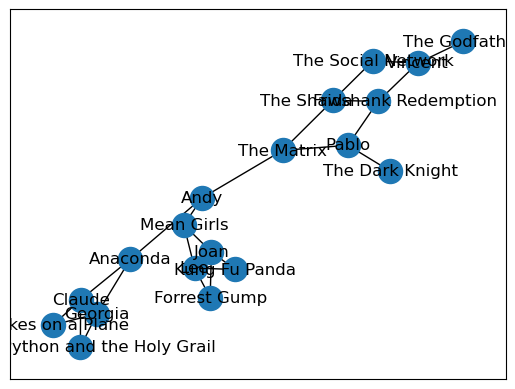

In [4]:
def answer_two():
    # Get the bipartite graph from the first function
    B = answer_one()
    
    # Add node attributes
    for node in B.nodes():
        if node in employees:
            B.nodes[node]['type'] = 'employee'
        else:
            B.nodes[node]['type'] = 'movie'
    
    # Plot the graph to visualize it
    plot_graph(B)  # This will plot the graph
   
    return B

answer_two()

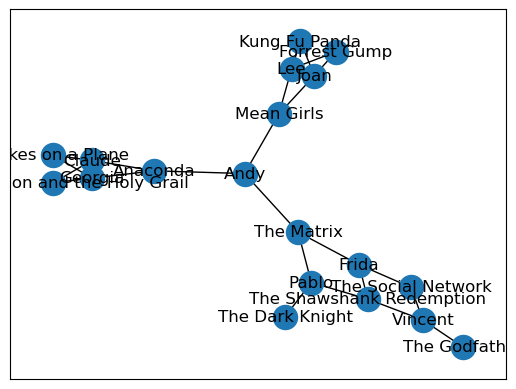

In [5]:
assert type(answer_two()) == nx.Graph , "Your return type should be a Graph object"


### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

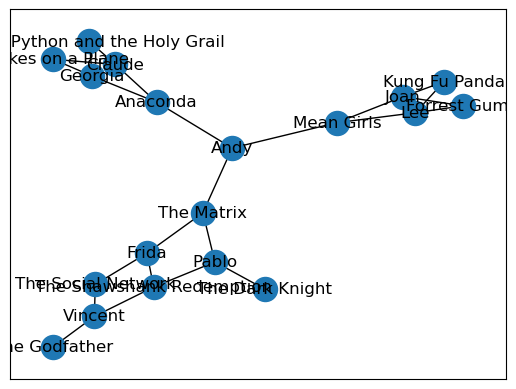

Edge (Pablo, Andy) has weight 1
Edge (Pablo, Frida) has weight 2
Edge (Pablo, Vincent) has weight 1
Edge (Frida, Andy) has weight 1
Edge (Frida, Vincent) has weight 2
Edge (Lee, Joan) has weight 3
Edge (Lee, Andy) has weight 1
Edge (Claude, Andy) has weight 1
Edge (Claude, Georgia) has weight 3
Edge (Joan, Andy) has weight 1
Edge (Andy, Georgia) has weight 1


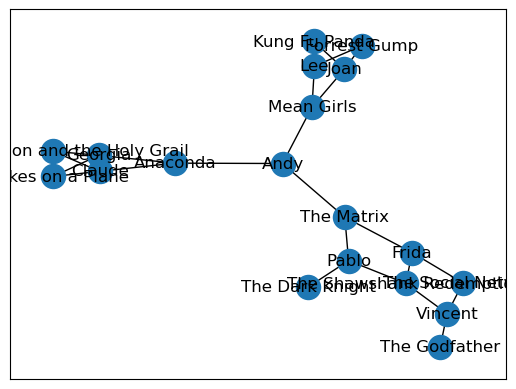

In [17]:
import networkx as nx

def answer_three():
    # Get the bipartite graph from answer_two
    B = answer_two()
    
    # Extract employees from the bipartite graph
    employees = {n for n, d in B.nodes(data=True) if d['type'] == 'employee'}
    
    # Use NetworkX's weighted projection for bipartite graphs
    P = nx.bipartite.weighted_projected_graph(B, employees)
    
    return P

# Test the function and check the weighted edges
projected_graph = answer_three()

# Print the weighted edges for validation
for u, v, data in projected_graph.edges(data=True):
    print(f"Edge ({u}, {v}) has weight {data['weight']}")
answer_three()

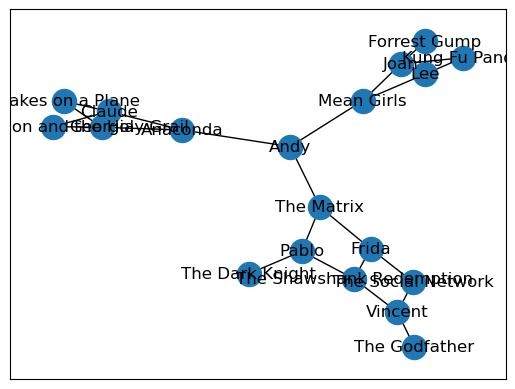

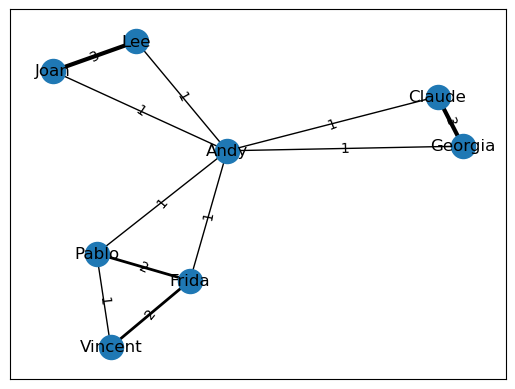

EdgeDataView([('Pablo', 'Andy', {'weight': 1}), ('Pablo', 'Frida', {'weight': 2}), ('Pablo', 'Vincent', {'weight': 1}), ('Frida', 'Andy', {'weight': 1}), ('Frida', 'Vincent', {'weight': 2}), ('Lee', 'Joan', {'weight': 3}), ('Lee', 'Andy', {'weight': 1}), ('Claude', 'Andy', {'weight': 1}), ('Claude', 'Georgia', {'weight': 3}), ('Joan', 'Andy', {'weight': 1}), ('Andy', 'Georgia', {'weight': 1})])

In [18]:
G = answer_three()
plot_graph(G, weight_name="weight")
G.edges(data = True)

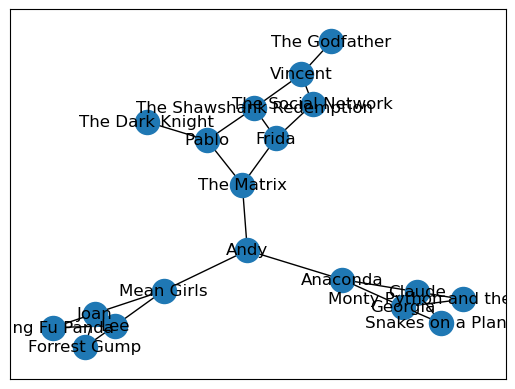

In [19]:
assert type(answer_three()) == nx.Graph , "Your return type should be a Graph object"


### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the pearson correlation between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

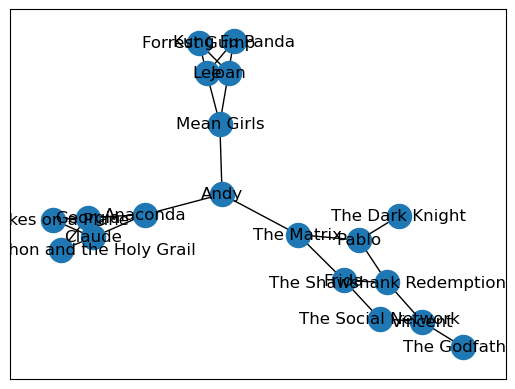

Pearson correlation: 0.7883962221733474


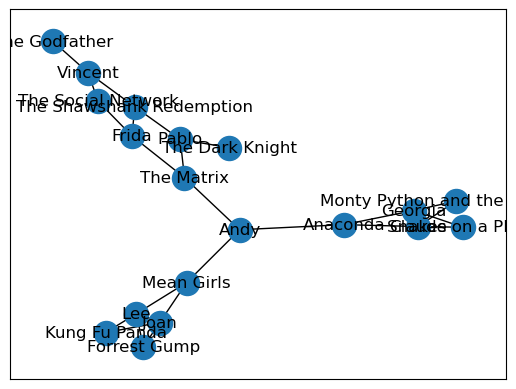

0.7883962221733474

In [9]:
import numpy as np
import networkx as nx

import numpy as np
import networkx as nx

def answer_four():
    # Get the bipartite movie graph and the employee relationship graph
    movie_graph = answer_two()  
    relationship_graph = nx.read_weighted_edgelist('assets/Employee_Relationships.txt', delimiter='\t', create_using=nx.Graph)
    
    # Create a dictionary to store the number of movies employees have in common
    common_movies = {}
    
    # Loop through all employees to calculate how many movies they have in common
    employees = {n for n, d in movie_graph.nodes(data=True) if d['type'] == 'employee'}
    for e1 in employees:
        for e2 in employees:
            if e1 != e2:
                common_count = len(set(movie_graph.neighbors(e1)) & set(movie_graph.neighbors(e2)))
                common_movies[(e1, e2)] = common_count
    
    # Prepare lists for the relationship scores and movie counts
    relationship_scores = []
    common_movie_counts = []
    
    for (e1, e2), movie_count in common_movies.items():
        if relationship_graph.has_edge(e1, e2):
            relationship_score = relationship_graph[e1][e2]['weight']
        else:
            relationship_score = 0  # No relationship means a score of 0
        
        relationship_scores.append(relationship_score)
        common_movie_counts.append(movie_count)
    
    # Calculate the Pearson correlation
    if len(relationship_scores) > 1 and len(common_movie_counts) > 1:
        correlation = np.corrcoef(relationship_scores, common_movie_counts)[0, 1]
        return float(correlation)
    else:
        return float('nan')  # Return NaN if there's insufficient data

# Check the Pearson correlation
ans_four = answer_four()
print("Pearson correlation:", ans_four)
answer_four()

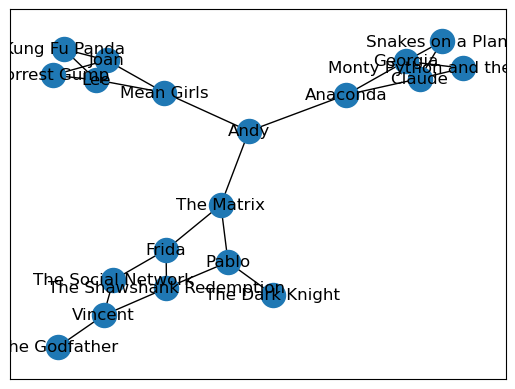

In [10]:
ans_four = answer_four()